# Marketing Analytics For E-Commerce Market Place Company

## Business Context:

The client is one of the leading online market place in India and would like partner with Analytixlabs. 
Client wants help in measuring, managing and analysing performance of business.

Analytixlabs has hired you as an analyst for this project where client asked you to provide data 
driven insights about business and understand customer, seller behaviors, product behavior and 
channel behavior etc...

While working on this project, you are expected to clean the data (if required) before analyze it.

### Available Data:

Data has been provided for the period of Sep 2016 to Oct 2018 and the below is the data model.

#### Tables:

Customers: Customers information

Sellers: Sellers information

Products: Product information

Orders: Orders info like ordered, product id, status, order dates etc..

Order_Items: Order level information

Order_Payments: Order payment information

Order_Review_Ratings: Customer ratings at order level

Geo-Location: Location details

#### Data Model:




## Business Objective:

The below are few Sample business questions to be addressed as part of this analysis. However this 
is not exhaustive list and you can add as many as analysis and provide insights on the same.


#### 1. Perform Detailed exploratory analysis

a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…) 

b. Understanding how many new customers acquired every month

c. Understand the retention of customers on month on month basis

d. How the revenues from existing/new customers on month on month basis

e. Understand the trends/seasonality of sales, quantity by category, location, month, 
week, day, time, channel, payment method etc…

f. Popular Products by month, seller, state, category.

g. Popular categories by state, month

h. List top 10 most expensive products sorted by price


#### 2. Performing Customers/sellers Segmentation

a. Divide the customers into groups based on the revenue generated 

b. Divide the sellers into groups based on the revenue generated 


#### 3. Cross-Selling (Which products are selling together)

Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)


#### 4. Payment Behaviour

a. How customers are paying?

b. Which payment channels are used by most customers?


#### 5. Customer satisfaction towards category & product

a. Which categories (top 10) are maximum rated & minimum rated?

b. Which products (top10) are maximum rated & minimum rated?

c. Average rating by location, seller, product, category, month etc.
Etc..



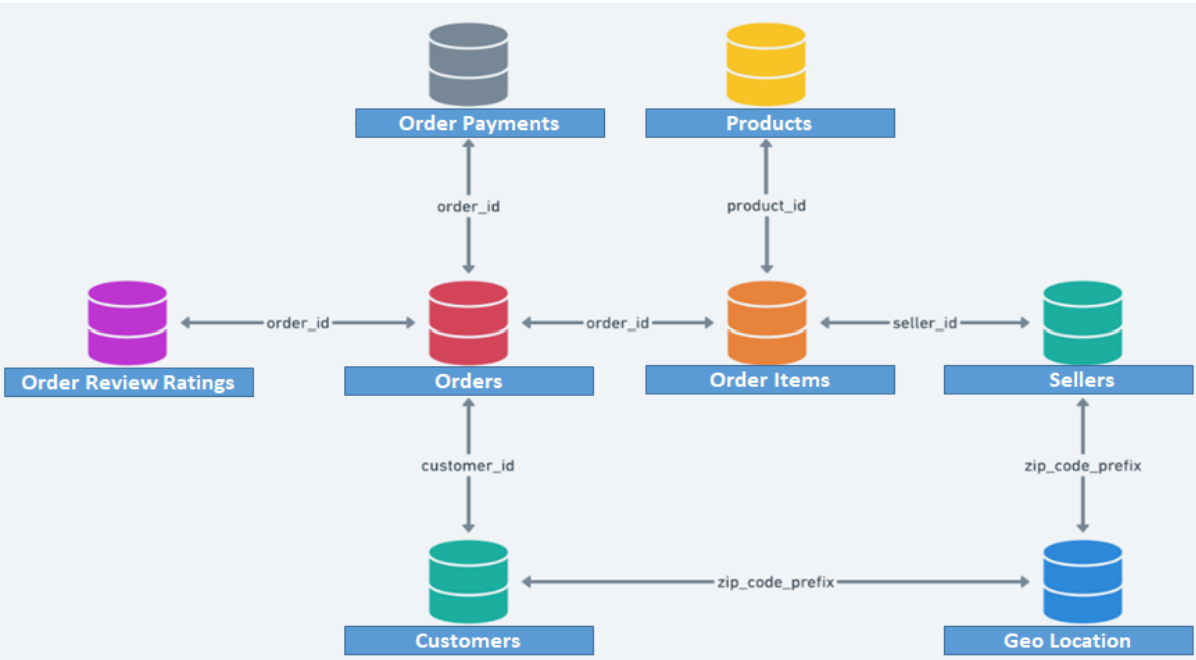

In [1]:
# Data Model:
from PIL import Image
# Imposrting image of data model
myImage = Image.open("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/Data_model.png")
myImage

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing datasets

cust = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/CUSTOMERS.csv")
loc = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/GEO_LOCATION.csv")
order_item = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/ORDER_ITEMS.csv")
payment = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/ORDER_PAYMENTS.csv")
rating = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/ORDER_REVIEW_RATINGS.csv")
order = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/ORDERS.csv")
product = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/PRODUCTS.csv")
seller = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_End_to_End_Case_Study_E_Commerce_Analytics_Project/SELLERS.csv")

In [4]:
cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [5]:
loc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [6]:
order_item 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [7]:
payment 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
rating

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [9]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [10]:
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


### Data cleaning

##### Data cleaning of table customer

In [12]:
print('Duplicate record in customer : ',cust.duplicated().sum())
print('Duplicate record in seller : ',seller.duplicated().sum())
print('Duplicate record in Product : ',product.duplicated().sum())
print('Duplicate record in Order : ',order.duplicated().sum())
print('Duplicate record in Order_Item : ',order_item.duplicated().sum())
print('Duplicate record in Payment : ',payment.duplicated().sum())
print('Duplicate record in Rating : ',rating.duplicated().sum())
print('Duplicate record in Location : ',loc.duplicated().sum())

Duplicate record in customer :  0
Duplicate record in seller :  0
Duplicate record in Product :  0
Duplicate record in Order :  0
Duplicate record in Order_Item :  0
Duplicate record in Payment :  0
Duplicate record in Rating :  0
Duplicate record in Location :  0


In [13]:
cust.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh


In [14]:
print('customer table')
# for datatypes, shape and non null value count
print(cust.info())

# No null value value in customer tables

# 99441 records and 5 veriables  

customer table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [15]:
seller.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh


In [16]:
print('seller table')
# for datatypes, shape and non null value count
print(seller.info())

# dropping nulls
seller.dropna(inplace=True)

# 3038 records and 4 veriables remaining

seller table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [17]:
product.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [18]:
print('products table')
# for datatypes, shape and non null value count
print(product.info())

# dropping nulls
product.dropna(inplace=True)

# 32327 records and 9 veriables remaining

products table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [19]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [20]:
print('order table')
# for datatypes, shape and non null value count
print(order.info())

# dropping nulls
order.dropna(inplace=True)

# 96461 records and 8 veriables remaining

order table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [21]:
# Converting date and time related columns in datetime for table orders

order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], format='%m/%d/%Y %H:%M')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'], format='%m/%d/%Y %H:%M')
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'], format='%m/%d/%Y %H:%M')
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], format='%m/%d/%Y %H:%M')
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], format='%m/%d/%Y %H:%M')

In [22]:
order_item.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29


In [23]:
print('order item table')
# for datatypes, shape and non null value count
print(order_item.info())

#No null record found

# 112650 records and 7 veriables

order item table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [24]:
# Converting date and time related columns in datetime for order item orders
order_item['shipping_limit_date'] = pd.to_datetime(order_item['shipping_limit_date'], format='%m/%d/%Y %H:%M')

In [25]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
print('payment table')
# for datatypes, shape and non null value count
print(payment.info())

# No null value found

# 103886 records and 5 veriables

payment table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [27]:
rating.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46


In [28]:
print('rating table')
# for datatypes, shape and non null value count
print(rating.info())

# No null value found

# 100000 records and 5 veriables

rating table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [29]:
# Converting date and time related columns in datetime for order item orders

rating['review_creation_date'] = pd.to_datetime(rating['review_creation_date'], format='%m/%d/%Y %H:%M')
rating['review_answer_timestamp'] = pd.to_datetime(rating['review_answer_timestamp'], format='%m/%d/%Y %H:%M')

In [30]:
loc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [31]:
print('location table')
# for datatypes, shape and non null value count
print(loc.info())

# No null value found

# 19015 records and 5 veriables

location table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB
None


### Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [32]:
print('Total revanue : ',order_item['price'].sum())
print('Total quantity :',order_item.shape[0])
print('Total products :',product.shape[0])
print('Total categories :',product['product_category_name'].nunique())
print('Total sellers :',seller['seller_id'].nunique())
print('Total locations :',loc.shape[0])
print('Total payment channels,  :',payment['payment_sequential'].nunique())
print('Total payment methods  :',payment['payment_type'].nunique())

Total revanue :  13591643.700000003
Total quantity : 112650
Total products : 32327
Total categories : 71
Total sellers : 3038
Total locations : 19015
Total payment channels,  : 29
Total payment methods  : 5


### Understanding how many new customers acquired every month

In [61]:
order['order_year_month'] = order['order_purchase_timestamp'].dt.strftime('%Y, %m')

In [62]:
# merging tables cust and order to get the unique cust count as some cust have more then 1 cust_id
OC =  pd.merge(left=order, right=cust, how='left', left_on='customer_id', right_on='customer_id')


In [63]:
# Total unique customers monthwise
unique_cust_monthwise = (OC[['order_year_month', 'customer_unique_id']].drop_duplicates(subset='customer_unique_id', keep='first')).groupby(by='order_year_month')[['customer_unique_id']].count()

In [65]:
unique_cust_monthwise

,customer_unique_id
order_year_month,
"2016, 09",1
"2016, 10",261
"2016, 12",1
"2017, 01",694
"2017, 02",1596
"2017, 03",2468
"2017, 04",2220
"2017, 05",3403
"2017, 06",2995


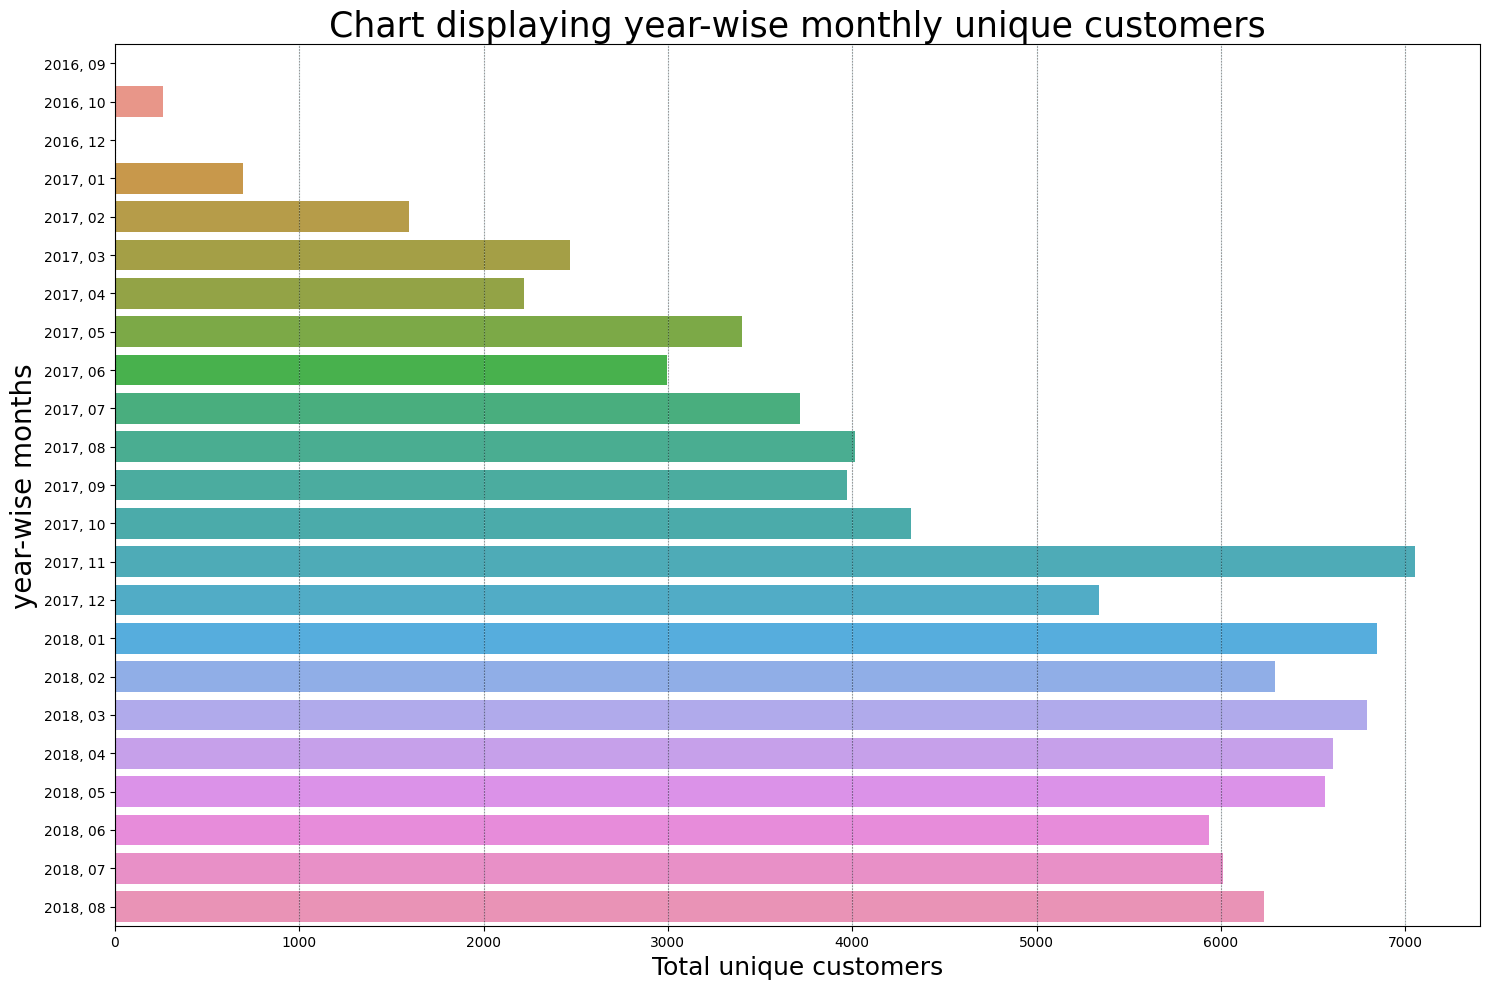

In [64]:
# To visualize

plt.figure(figsize=(15,10))
sns.barplot(x= unique_cust_monthwise['customer_unique_id'], y=unique_cust_monthwise.index)
plt.title('Chart displaying year-wise monthly unique customers', fontsize=25)
plt.ylabel('year-wise months',fontsize=20)
plt.xlabel('Total unique customers',fontsize=18)

plt.grid(linestyle=':', color= 'lightblue',alpha=.4,gapcolor='black', axis='x')
plt.tight_layout()
plt.show()

### Understand the retention of customers on month on month basis

In [37]:
all_cust = pd.merge(cust, order)

In [38]:
new_cust = pd.merge(cust, order).drop_duplicates(subset='customer_unique_id', keep='first')

In [39]:
All_cust_with_indicator = all_cust.merge(new_cust, on = 'customer_id', how='left', indicator=True)

In [40]:
All_cust_with_indicator._merge.value_counts()

both          93342
left_only      3119
right_only        0
Name: _merge, dtype: int64

In [41]:
retained_cust = All_cust_with_indicator[All_cust_with_indicator['_merge'] == 'left_only']
retained_cust

,customer_id,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,customer_state_y,order_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,order_year_month_y,_merge
650,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,Kanuru,Andhra Pradesh,3c8194a8d47f5852dcd52ccbf364596e,delivered,2017-11-27 12:44:00,2017-11-27 12:56:00,2017-11-30 19:25:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
1410,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,Badepalle,Andhra Pradesh,aec47b9987c836ffee2d7664b0929ec1,delivered,2017-10-10 18:31:00,2017-10-10 18:49:00,2017-10-13 17:07:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
2720,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,Anantapur,Andhra Pradesh,ef66cc60de5221417b5fb81b1c42de85,delivered,2018-03-31 15:08:00,2018-03-31 16:20:00,2018-04-03 16:31:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
3519,b59240e14630c3dad40626dcdaf69b18,5faabfe6772088c4d906b63fa81ac63d,95047,Bapatla,Andhra Pradesh,7652086d66b18b3e2f19c1a28d6cc670,delivered,2017-07-18 12:35:00,2017-07-18 12:50:00,2017-07-18 21:15:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
3668,c9f8da8278a23eb777ede2591b9ad3ee,c2551ea089b7ebbc67a2ea8757152514,44380,Hyderabad M.Corp,Andhra Pradesh,b2ae55d11609779855c398bc2bd74fd4,delivered,2017-05-27 16:15:00,2017-05-27 16:25:00,2017-05-29 13:09:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96346,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,Anantapur,Andhra Pradesh,3aefaf9d41208dba8b2c336def99b00f,delivered,2017-10-29 11:59:00,2017-10-30 10:12:00,2017-10-31 18:42:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
96349,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,Damnagar,Gujarat,46984ee8227e1926e055327b55ad576c,delivered,2017-12-13 17:35:00,2017-12-15 02:17:00,2017-12-19 20:33:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
96358,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,Vinukonda,Andhra Pradesh,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:00,2018-06-20 14:38:00,2018-06-20 15:02:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only
96374,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,Banda,Madhya Pradesh,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:00,2018-05-15 14:30:00,2018-05-15 15:55:00,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only


In [42]:
retained_cust.loc[:, 'order_year_month'] = retained_cust['order_purchase_timestamp_x'].dt.strftime('%Y, %m')

In [43]:
retained_cust.head(1)

,customer_id,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,order_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,order_year_month_y,_merge,order_year_month
650,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,Kanuru,Andhra Pradesh,3c8194a8d47f5852dcd52ccbf364596e,delivered,2017-11-27 12:44:00,2017-11-27 12:56:00,2017-11-30 19:25:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 11"


In [44]:
unique_retained_cust = retained_cust.drop_duplicates(subset=['order_year_month','customer_unique_id_x'])
unique_retained_cust

,customer_id,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,...,order_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,order_year_month_y,_merge,order_year_month
650,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,Kanuru,Andhra Pradesh,3c8194a8d47f5852dcd52ccbf364596e,delivered,2017-11-27 12:44:00,2017-11-27 12:56:00,2017-11-30 19:25:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 11"
1410,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,Badepalle,Andhra Pradesh,aec47b9987c836ffee2d7664b0929ec1,delivered,2017-10-10 18:31:00,2017-10-10 18:49:00,2017-10-13 17:07:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 10"
2720,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,Anantapur,Andhra Pradesh,ef66cc60de5221417b5fb81b1c42de85,delivered,2018-03-31 15:08:00,2018-03-31 16:20:00,2018-04-03 16:31:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2018, 03"
3519,b59240e14630c3dad40626dcdaf69b18,5faabfe6772088c4d906b63fa81ac63d,95047,Bapatla,Andhra Pradesh,7652086d66b18b3e2f19c1a28d6cc670,delivered,2017-07-18 12:35:00,2017-07-18 12:50:00,2017-07-18 21:15:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 07"
3668,c9f8da8278a23eb777ede2591b9ad3ee,c2551ea089b7ebbc67a2ea8757152514,44380,Hyderabad M.Corp,Andhra Pradesh,b2ae55d11609779855c398bc2bd74fd4,delivered,2017-05-27 16:15:00,2017-05-27 16:25:00,2017-05-29 13:09:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96346,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,Anantapur,Andhra Pradesh,3aefaf9d41208dba8b2c336def99b00f,delivered,2017-10-29 11:59:00,2017-10-30 10:12:00,2017-10-31 18:42:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 10"
96349,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,Damnagar,Gujarat,46984ee8227e1926e055327b55ad576c,delivered,2017-12-13 17:35:00,2017-12-15 02:17:00,2017-12-19 20:33:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2017, 12"
96358,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,Vinukonda,Andhra Pradesh,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:00,2018-06-20 14:38:00,2018-06-20 15:02:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2018, 06"
96374,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,Banda,Madhya Pradesh,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:00,2018-05-15 14:30:00,2018-05-15 15:55:00,...,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,left_only,"2018, 05"


In [45]:
Count_unique_retained_cust_monthly = unique_retained_cust.groupby(by='order_year_month')[['customer_zip_code_prefix_x']].count()

In [46]:
Count_unique_retained_cust_monthly

,customer_zip_code_prefix_x
order_year_month,
"2016, 10",9
"2016, 12",1
"2017, 01",37
"2017, 02",46
"2017, 03",80
"2017, 04",77
"2017, 05",150
"2017, 06",127
"2017, 07",141


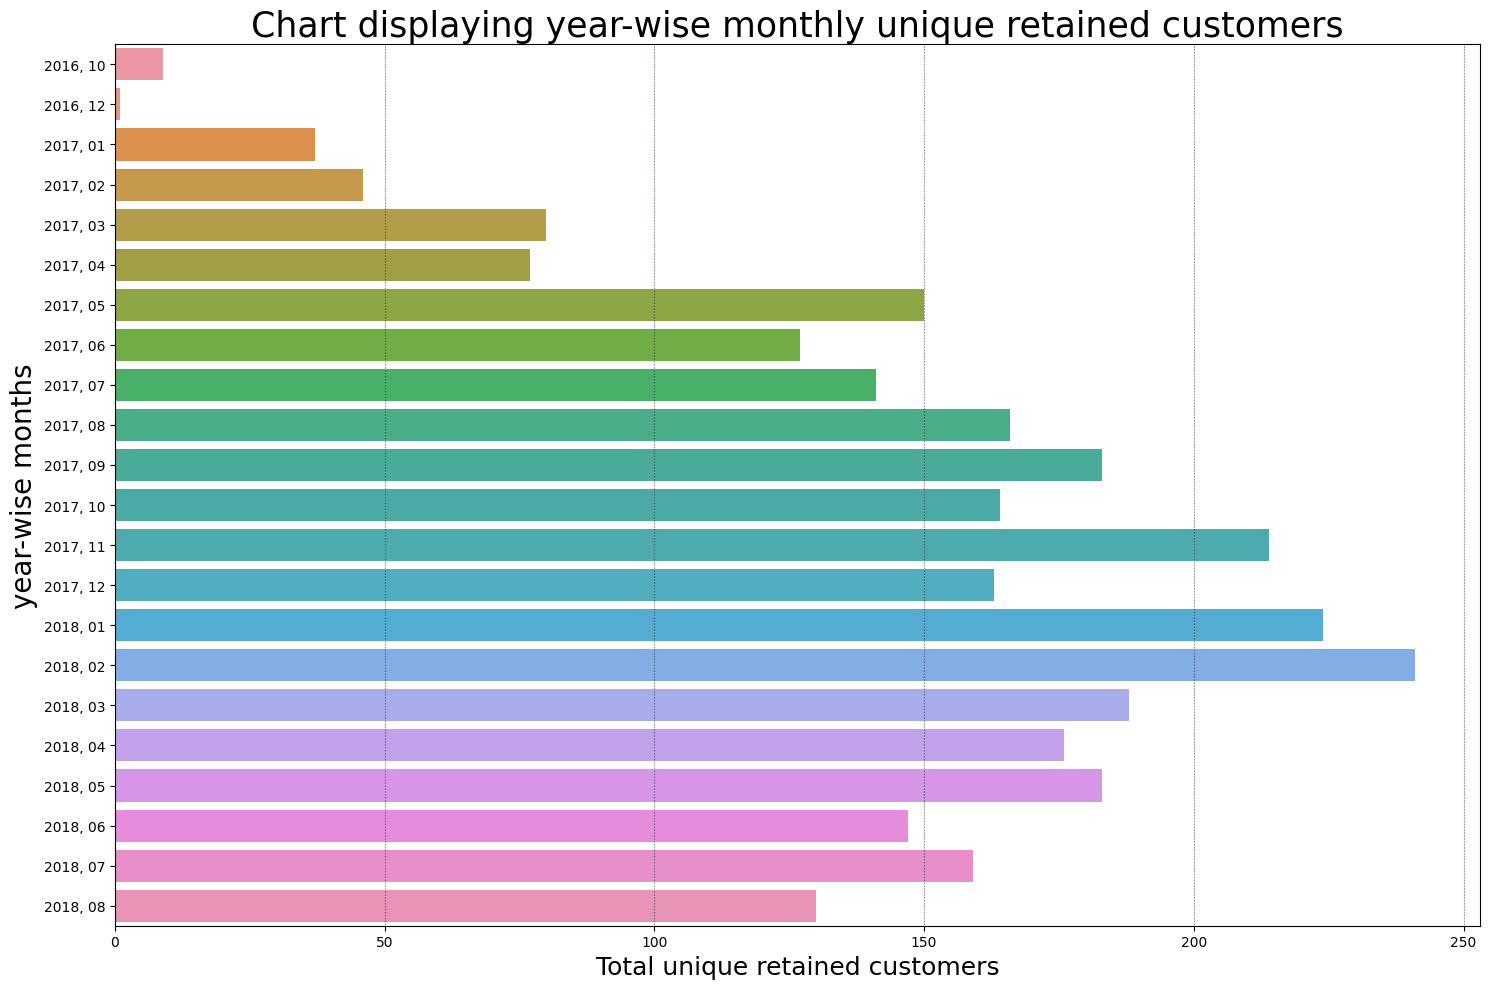

In [47]:
# To visualize

plt.figure(figsize=(15,10))
sns.barplot(x= Count_unique_retained_cust_monthly['customer_zip_code_prefix_x'], y=Count_unique_retained_cust_monthly.index)
plt.title('Chart displaying year-wise monthly unique retained customers', fontsize=25)
plt.ylabel('year-wise months',fontsize=20)
plt.xlabel('Total unique retained customers',fontsize=18)

plt.grid(linestyle=':', color= 'lightblue',alpha=.4,gapcolor='black', axis='x')
plt.tight_layout()
plt.show()

### How the revenues from existing/new customers on month on month basis

In [48]:
retained_cust = retained_cust.dropna(axis=1, how='all')
retained_cust

,customer_id,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,order_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,order_year_month_x,_merge,order_year_month
650,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,Kanuru,Andhra Pradesh,3c8194a8d47f5852dcd52ccbf364596e,delivered,2017-11-27 12:44:00,2017-11-27 12:56:00,2017-11-30 19:25:00,2017-12-01 17:05:00,2017-12-11,"2017, 11",left_only,"2017, 11"
1410,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,Badepalle,Andhra Pradesh,aec47b9987c836ffee2d7664b0929ec1,delivered,2017-10-10 18:31:00,2017-10-10 18:49:00,2017-10-13 17:07:00,2017-10-20 18:29:00,2017-11-17,"2017, 10",left_only,"2017, 10"
2720,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,Anantapur,Andhra Pradesh,ef66cc60de5221417b5fb81b1c42de85,delivered,2018-03-31 15:08:00,2018-03-31 16:20:00,2018-04-03 16:31:00,2018-04-06 19:06:00,2018-05-04,"2018, 03",left_only,"2018, 03"
3519,b59240e14630c3dad40626dcdaf69b18,5faabfe6772088c4d906b63fa81ac63d,95047,Bapatla,Andhra Pradesh,7652086d66b18b3e2f19c1a28d6cc670,delivered,2017-07-18 12:35:00,2017-07-18 12:50:00,2017-07-18 21:15:00,2017-07-31 21:04:00,2017-08-09,"2017, 07",left_only,"2017, 07"
3668,c9f8da8278a23eb777ede2591b9ad3ee,c2551ea089b7ebbc67a2ea8757152514,44380,Hyderabad M.Corp,Andhra Pradesh,b2ae55d11609779855c398bc2bd74fd4,delivered,2017-05-27 16:15:00,2017-05-27 16:25:00,2017-05-29 13:09:00,2017-06-08 12:03:00,2017-06-29,"2017, 05",left_only,"2017, 05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96346,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,Anantapur,Andhra Pradesh,3aefaf9d41208dba8b2c336def99b00f,delivered,2017-10-29 11:59:00,2017-10-30 10:12:00,2017-10-31 18:42:00,2017-11-06 21:18:00,2017-11-24,"2017, 10",left_only,"2017, 10"
96349,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,Damnagar,Gujarat,46984ee8227e1926e055327b55ad576c,delivered,2017-12-13 17:35:00,2017-12-15 02:17:00,2017-12-19 20:33:00,2018-01-05 22:24:00,2018-01-22,"2017, 12",left_only,"2017, 12"
96358,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,Vinukonda,Andhra Pradesh,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:00,2018-06-20 14:38:00,2018-06-20 15:02:00,2018-06-27 13:18:00,2018-07-18,"2018, 06",left_only,"2018, 06"
96374,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,Banda,Madhya Pradesh,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:00,2018-05-15 14:30:00,2018-05-15 15:55:00,2018-05-22 19:42:00,2018-06-12,"2018, 05",left_only,"2018, 05"


In [49]:
# Revanue of retained customers

In [50]:
retianed_cust_revanue =  pd.merge(left=retained_cust, right=order_item, right_on='order_id', left_on='order_id_x').drop_duplicates(subset='customer_id')

In [51]:
new_cust_revanue = pd.merge(left=new_cust, right=order_item, on = 'order_id') 

In [52]:
print('Revanue from new customers : ', new_cust_revanue['price'].sum())
print('Revanue from retained customers : ', retianed_cust_revanue['price'].sum())

Revanue from new customers :  12826674.63
Revanue from retained customers :  337903.24


In [53]:
# To visualize

Rev = pd.DataFrame([new_cust_revanue['price'].sum(), retianed_cust_revanue['price'].sum()],columns=['Revanue'])

In [54]:
Rev

,Revanue
0,12826674.63
1,337903.24


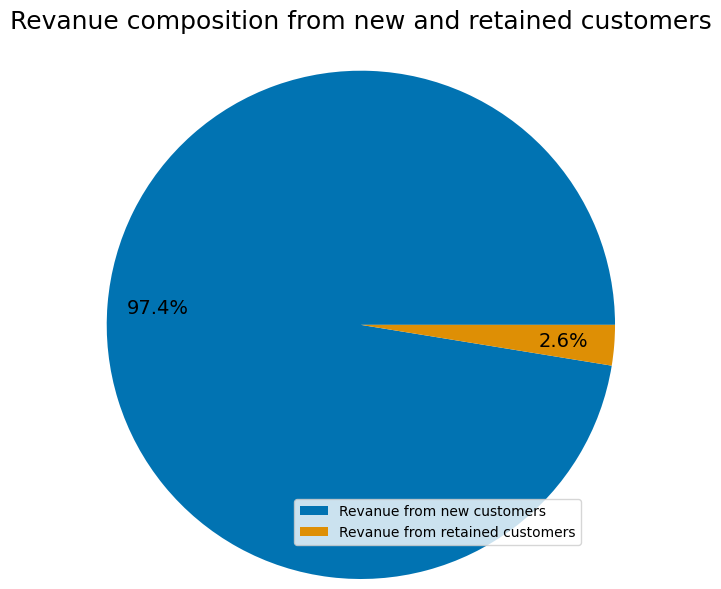

In [55]:
plt.figure(figsize=(6,6))

plt.pie(
Rev['Revanue']

,colors=sns.color_palette('colorblind')
, radius=1.4, 
autopct='%.1f%%',
pctdistance=.8,
textprops={'fontsize': 14})

plt.title('Revanue composition from new and retained customers',pad=50, fontsize= 18)

plt.legend(loc='lower right', labels=['Revanue from new customers','Revanue from retained customers'])
plt.tight_layout()
plt.show()

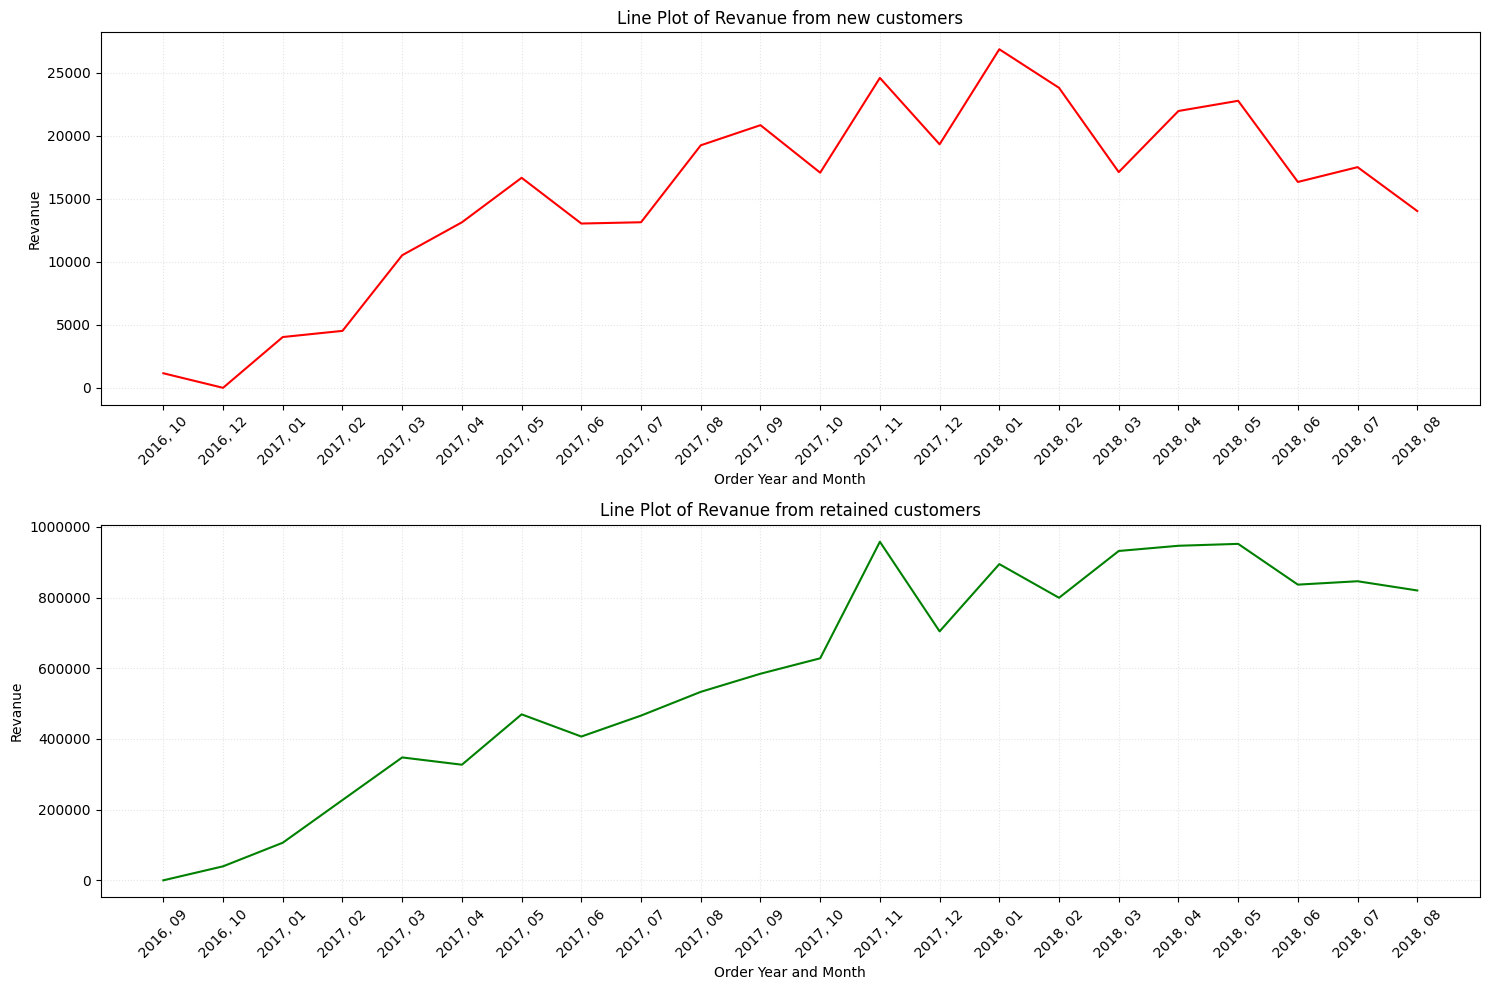

In [56]:
# To visaulize

A = retianed_cust_revanue.groupby(by='order_year_month')[['price']].sum()
B = new_cust_revanue.groupby(by='order_year_month')[['price']].sum()

# Chart
plt.figure(figsize=(15, 10))

plt.subplot(2,1,1)
sns.lineplot(y=A.price, x=A.index, color='red')

plt.xlabel('Order Year and Month')
plt.ylabel('Revanue')
plt.title('Line Plot of Revanue from new customers')
plt.xticks(rotation=45)
plt.grid(linestyle=':', color= 'lightgray',alpha=.6)


plt.subplot(2,1,2)
plt.ticklabel_format(style='plain')
sns.lineplot(y=B.price, x=B.index, color='green')
plt.xlabel('Order Year and Month')
plt.ylabel('Revanue')
plt.title('Line Plot of Revanue from retained customers')
plt.xticks(rotation=45)

plt.grid(linestyle=':', color= 'lightgray',alpha=.6)
plt.tight_layout()
plt.show()


### Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [57]:
merged_df = pd.merge(order_item,product, on='product_id').merge(seller, on='seller_id').merge(loc, left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix').merge(order, on='order_id').merge(cust, on='customer_id').merge(rating,on='order_id').merge(payment,on='order_id')

In [58]:
merged_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.29,Cool_Stuff,58.0,598.0,...,Guntakal,Andhra Pradesh,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:00,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:00,55.9,17.96,Cool_Stuff,58.0,598.0,...,Vadodara,Gujarat,b11cba360bbe71410c291b764753d37f,5,2017-07-14,2017-07-17 12:50:00,1,UPI,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:00,64.9,18.33,Cool_Stuff,58.0,598.0,...,Anantapur,Andhra Pradesh,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05,2018-06-06 21:41:00,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:00,58.9,16.17,Cool_Stuff,58.0,598.0,...,Chunchupalle,Andhra Pradesh,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10,2017-08-13 03:35:00,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:00,58.9,13.29,Cool_Stuff,58.0,598.0,...,Roshan Pura alias Dichaon Khurd,Delhi,426f43a82185969503fb3c86241a9535,5,2017-08-25,2017-08-28 00:51:00,1,credit_card,4,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112229,f8d4190f8951914e3d79e7b6b7871470,2,d8fb151eb350f0956fbd847567d78954,497709c2976a8fa308730a2dec5b0726,2018-07-25 19:35:00,38.0,9.02,Stationery,43.0,386.0,...,Akkarampalle,Andhra Pradesh,53baac26335a1f1ecd58566d3530f34c,5,2018-07-26,2018-08-05 23:07:00,1,credit_card,1,94.04
112230,f9c44da06151c190a9a6c9c712873d10,1,b864b103180d5a6a3f830e67f93e8735,f5b84683a9bf9e1df748cf40f601b39c,2016-10-15 15:09:00,83.9,9.07,Baby,47.0,980.0,...,Akkarampalle,Andhra Pradesh,a5bb3aa21e746eb38caa0fb1f251f5d9,5,2016-10-19,2016-10-20 04:27:00,1,credit_card,5,92.97
112231,fa8af66ee11f929d58f95e9a0522d792,1,0630f740d3f05c50f85d7dd7cffc60a3,cad10cc982ab6a391570c211b995c17c,2018-04-26 12:31:00,47.4,12.79,Costruction_Tools_Garden,49.0,414.0,...,Akkarampalle,Andhra Pradesh,6d2a48d18dfe5989f975e01d35677a7e,5,2018-04-27,2018-04-28 00:21:00,1,credit_card,3,60.19
112232,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:00,27.9,14.44,Drinks,28.0,242.0,...,Gadwal,Andhra Pradesh,2926f21f2f2aba2ce11d801e17eac783,5,2018-04-21,2018-04-24 14:13:00,1,credit_card,1,84.68


In [59]:
print('https://github.com/dharmendra-singh-ch3/Python-Foundation-End-to-End-Case-Study-E-Commerce-Analytics-Project/blob/main/Final%20Capstone%20Project%20-%20Marketing%20Analytics.ipynb')

https://github.com/dharmendra-singh-ch3/Python-Foundation-End-to-End-Case-Study-E-Commerce-Analytics-Project/blob/main/Final%20Capstone%20Project%20-%20Marketing%20Analytics.ipynb


In [60]:
print('https://github.com/dharmendra-singh-ch3/Python-Foundation-End-to-End-Case-Study-E-Commerce-Analytics-Project/blob/main/Final%20Capstone%20Project%20-%20Marketing%20Analytics.ipynb')

https://github.com/dharmendra-singh-ch3/Python-Foundation-End-to-End-Case-Study-E-Commerce-Analytics-Project/blob/main/Final%20Capstone%20Project%20-%20Marketing%20Analytics.ipynb
